[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Data Summaries:

Summary for TSLA:
               Open         High          Low        Close    Adj Close  \
count  2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean    111.461872   113.895836   108.869421   111.438965   111.438965   
std     110.208156   112.643277   107.541830   110.120450   110.120450   
min       9.488000    10.331333     9.403333     9.578000     9.578000   
25%      17.058499    17.368167    16.790167    17.066167    17.066167   
50%      24.986667    25.279000    24.462334    25.043000    25.043000   
75%     217.264999   221.910004   212.084999   216.865002   216.865002   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  2.474000e+03  
mean   1.125745e+08  
std    7.449619e+07  
min    1.062000e+07  
25%    6.682590e+07  
50%    9.289395e+07  
75%    1.301899e+08  
max    9.140820e+08  

Summary for BND:
               Open         High          Low        Close    Adj Close  \
count

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)



Outliers for TSLA:
 {'High Returns': Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, Daily Return, Rolling Mean, Rolling Std]
Index: [], 'Low Returns': Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, Daily Return, Rolling Mean, Rolling Std]
Index: []}

Outliers for BND:
 {'High Returns': Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, Daily Return, Rolling Mean, Rolling Std]
Index: [], 'Low Returns': Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, Daily Return, Rolling Mean, Rolling Std]
Index: []}

Outliers for SPY:
 {'High Returns': Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, Daily Return, Rolling Mean, Rolling Std]
Index: [], 'Low Returns': Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, Daily Return, Rolling Mean, Rolling Std]
Index: []}

Risk Metrics:

Risk Metrics for TSLA:
 {'Sharpe Ratio': nan, 'VaR (95%)': -0.08584263327030102}

Risk Metrics for BN

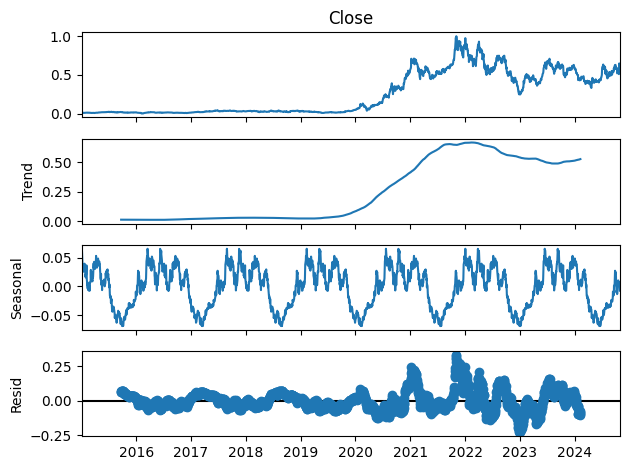

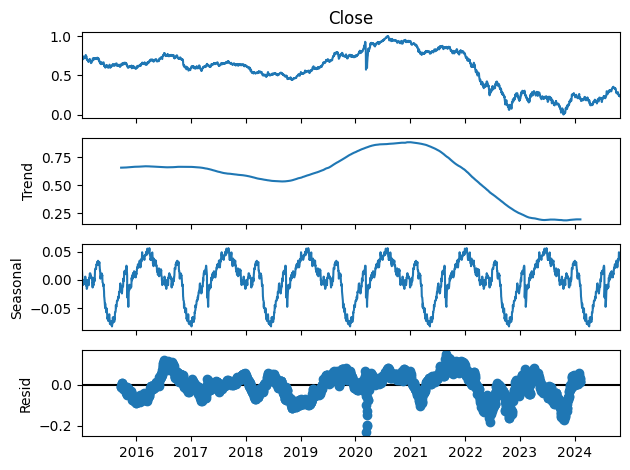

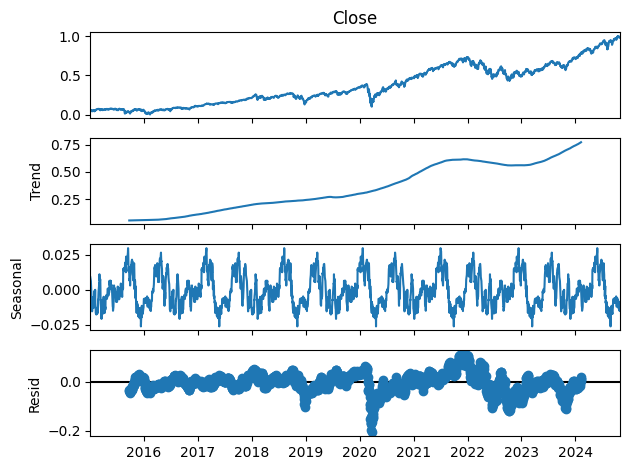

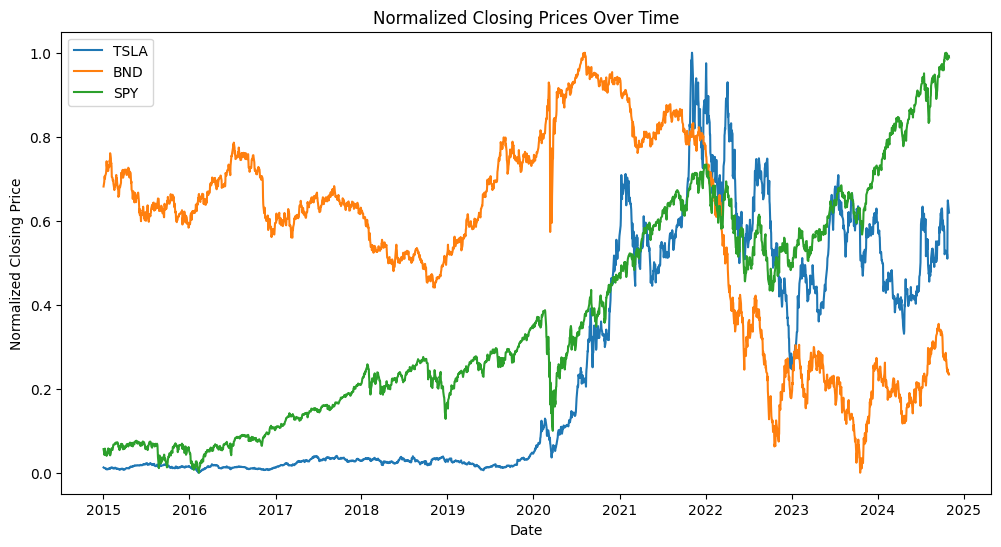

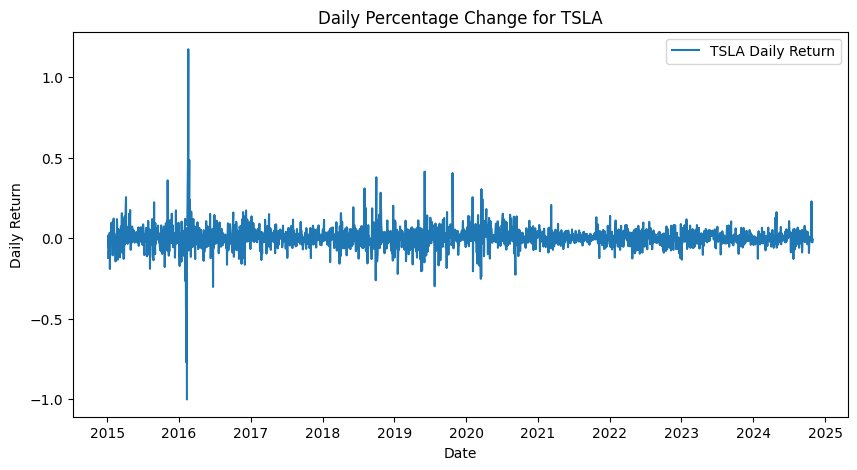

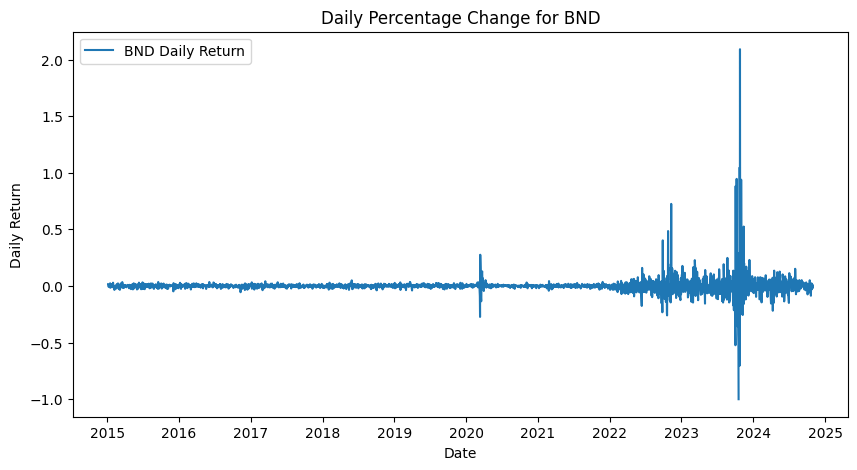

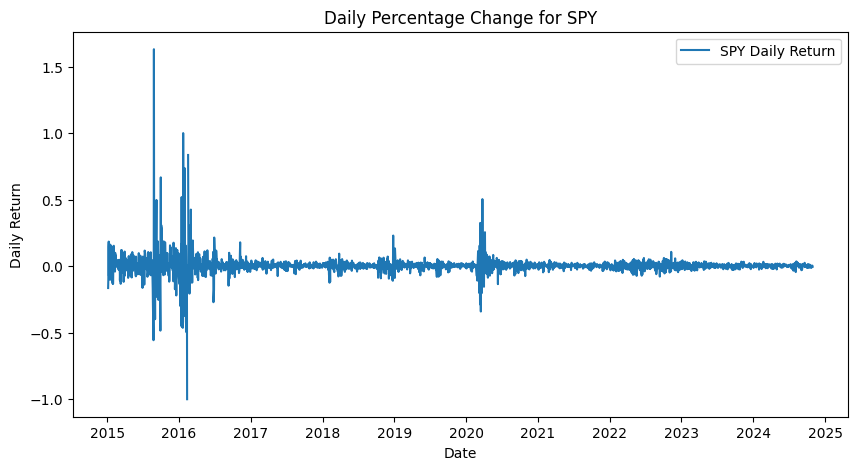

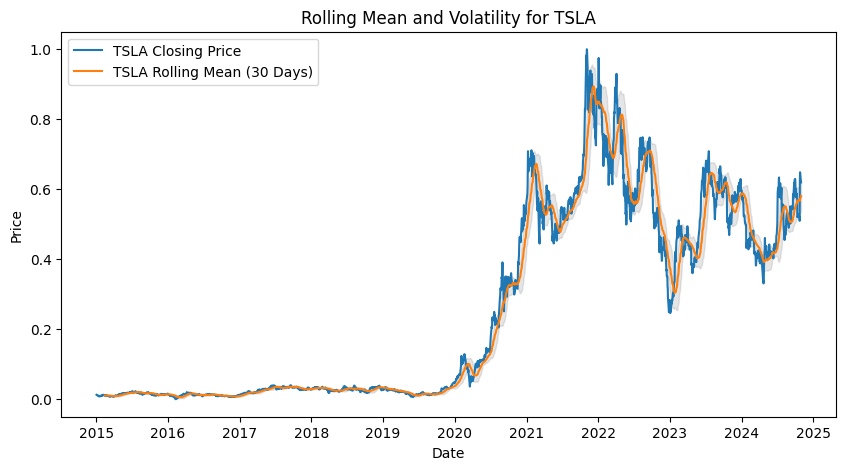

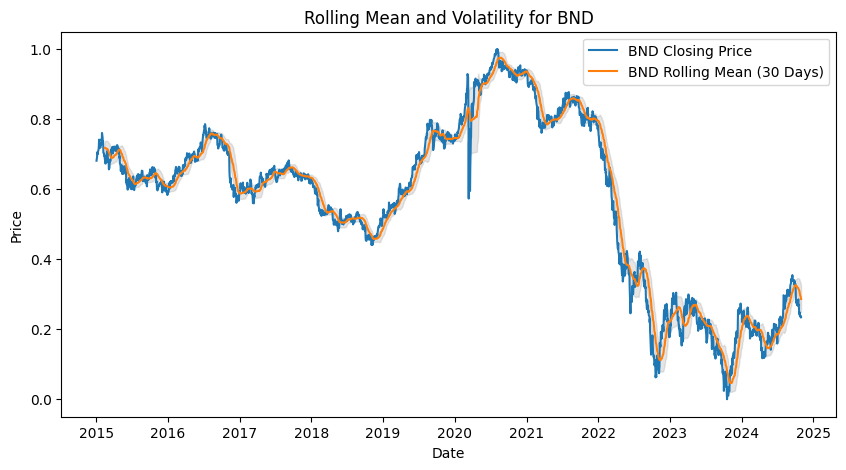

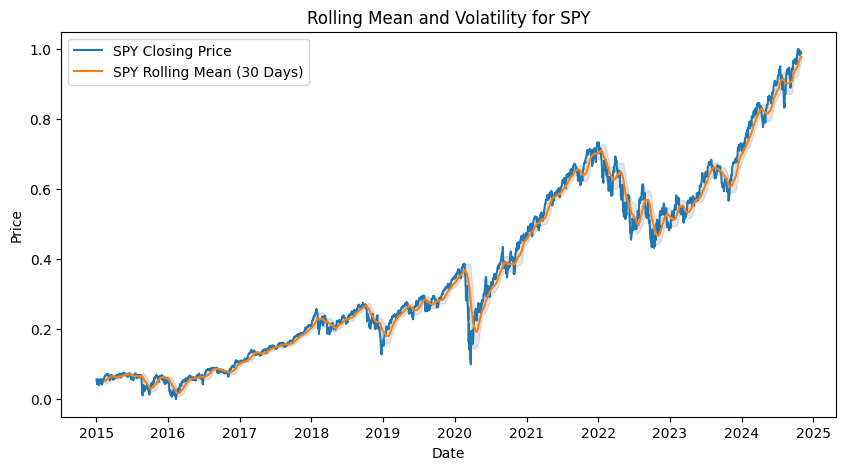

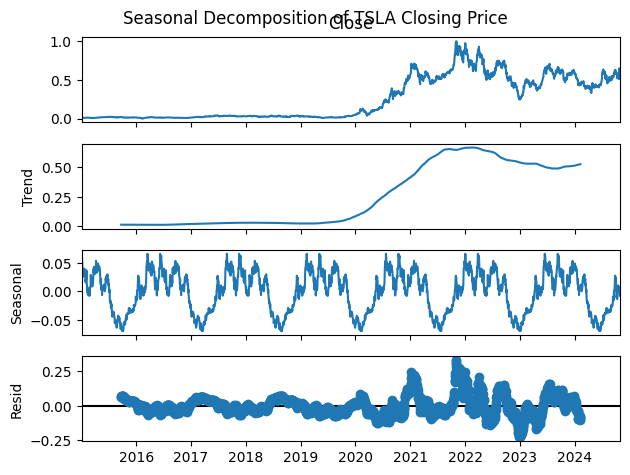

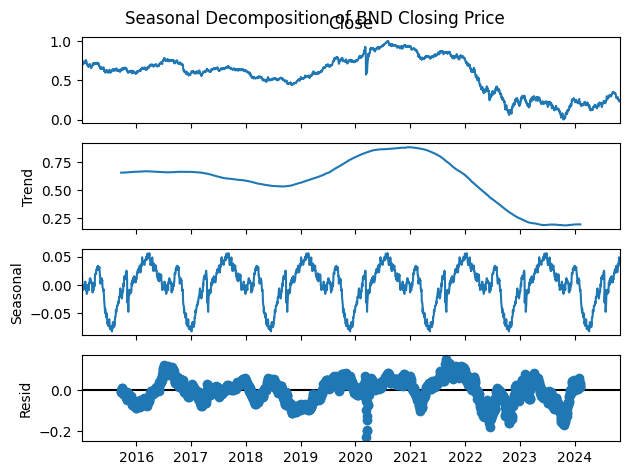

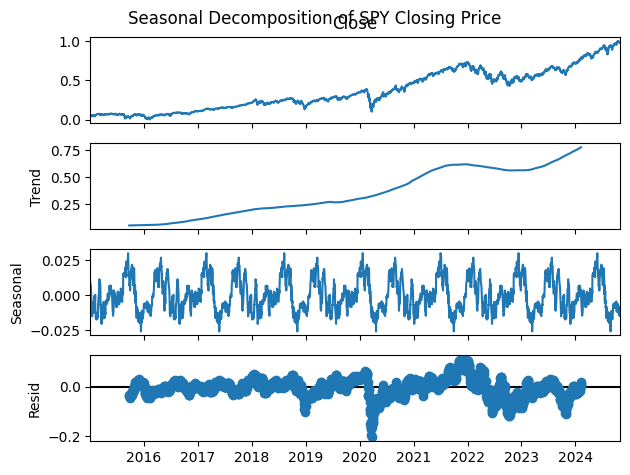

Key Insights for TSLA:
  - Overall Direction: Observed trends in closing price over time.
  - Fluctuations in Daily Returns: Daily return patterns and their impact on volatility.
  - Risk Metrics - Sharpe Ratio: nan, VaR (95%): -0.09


Key Insights for BND:
  - Overall Direction: Observed trends in closing price over time.
  - Fluctuations in Daily Returns: Daily return patterns and their impact on volatility.
  - Risk Metrics - Sharpe Ratio: nan, VaR (95%): -0.06


Key Insights for SPY:
  - Overall Direction: Observed trends in closing price over time.
  - Fluctuations in Daily Returns: Daily return patterns and their impact on volatility.
  - Risk Metrics - Sharpe Ratio: nan, VaR (95%): -0.06




In [1]:
# Import necessary libraries and modules
import importlib.util
import sys
import matplotlib.pyplot as plt
import os

# Define the absolute path to the script (update this path as needed)
file_path = r'C:/Users/user/Desktop/Github/Portfolio_TimeseriesForcasting/scripts/Data_preprocessing.py'

# Load the module from the file path
spec = importlib.util.spec_from_file_location("Data_preprocessing", file_path)
data_preprocessing = importlib.util.module_from_spec(spec)
sys.modules["Data_preprocessing"] = data_preprocessing
spec.loader.exec_module(data_preprocessing)

# Import functions from the Data_preprocessing module
from Data_preprocessing import (
    fetch_data, data_summary, check_data_types, clean_data, normalize_data,
    calculate_daily_return, rolling_statistics, seasonal_decomposition,
    detect_outliers, calculate_risk_metrics
)

# Define parameters for analysis
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

# Step 1: Fetch and Clean Data
data = fetch_data(tickers, start_date, end_date)
summary = data_summary(data)
types = check_data_types(data)
data = clean_data(data)
data = normalize_data(data)

# Display Data Summaries and Data Types
print("\nData Summaries:")
for ticker, summ in summary.items():
    print(f"\nSummary for {ticker}:\n", summ)

print("\nData Types:")
for ticker, dtype in types.items():
    print(f"\nData Types for {ticker}:\n", dtype)

# Step 2: Calculate Daily Return
data = calculate_daily_return(data)

# Step 3: Calculate Rolling Statistics (Mean & Std)
data = rolling_statistics(data, window=30)

# Step 4: Seasonal Decomposition
decompositions = seasonal_decomposition(data, period=365)

# Step 5: Outlier Detection
outliers = detect_outliers(data)
for ticker, out in outliers.items():
    print(f"\nOutliers for {ticker}:\n", out)

# Step 6: Calculate Risk Metrics (Sharpe Ratio & VaR)
risk_metrics = calculate_risk_metrics(data)
print("\nRisk Metrics:")
for ticker, metrics in risk_metrics.items():
    print(f"\nRisk Metrics for {ticker}:\n", metrics)

# Visualization Section

# Plot normalized closing prices over time
plt.figure(figsize=(12, 6))
for ticker, df in data.items():
    plt.plot(df.index, df['Close'], label=ticker)
plt.title("Normalized Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Normalized Closing Price")
plt.legend()
plt.show()

# Plot daily percentage change for each ticker
for ticker, df in data.items():
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Daily Return'], label=f"{ticker} Daily Return")
    plt.title(f"Daily Percentage Change for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Daily Return")
    plt.legend()
    plt.show()

# Plot rolling mean and standard deviation for each ticker
for ticker, df in data.items():
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Close'], label=f"{ticker} Closing Price")
    plt.plot(df.index, df['Rolling Mean'], label=f"{ticker} Rolling Mean (30 Days)")
    plt.fill_between(
        df.index,
        df['Rolling Mean'] - df['Rolling Std'],
        df['Rolling Mean'] + df['Rolling Std'],
        color='gray',
        alpha=0.2
    )
    plt.title(f"Rolling Mean and Volatility for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

# Plot seasonal decomposition for each ticker
for ticker, result in decompositions.items():
    result.plot()
    plt.suptitle(f"Seasonal Decomposition of {ticker} Closing Price")
    plt.show()

# Document key insights from analysis
for ticker, metrics in risk_metrics.items():
    print(f"Key Insights for {ticker}:")
    print(f"  - Overall Direction: Observed trends in closing price over time.")
    print(f"  - Fluctuations in Daily Returns: Daily return patterns and their impact on volatility.")
    print(f"  - Risk Metrics - Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}, VaR (95%): {metrics['VaR (95%)']:.2f}")
    print("\n")
